# Proyek Analisis Data: Bike Sharing
- **Nama:** Valentio Stanley Gunadi
- **Email:** valentiostanley23@gmail.com
- **ID Dicoding:** tiotan

## Menentukan Pertanyaan Bisnis

- Jenis musim apa yang paling sering muncul dalam sebulan terakhir berdasarkan frekuensi data harian yang diukurkan dari dataset day?
- Jenis musim dingin apa (termasuk Fall & Winter) yang paling sering muncul terjadi berdasarkan perhitungan jam yang dihasilkan?

## Import Semua Packages/Library yang Digunakan

In [1]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install babel

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# %pip install streamlit

In [4]:
%pip freeze requirements.txt

absl-py==2.1.0
accelerate==1.1.1
aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
altair==5.5.0
anyio==4.7.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
blinker==1.8.2
cachetools==5.5.2
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
confusion_matrix==0.1
contourpy==1.3.0
cycler==0.12.1
datasets==3.1.0
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.8
distlib==0.3.8
emoji==2.12.1
executing==2.1.0
fastjsonschema==2.21.1
filelock==3.15.4
Flask==3.0.3
flatbuffers==24.3.25
fonttools==4.53.1
fqdn==1.5.1
frozenlist==1.5.0
fsspec==2024.9.0
gast==0.6.0
gitdb==4.0.12
GitPython==3.1.44
google-pasta==0.2.0
grpcio==1.66.1
h11==0.14.0
h5py==3.11.0
httpcore==1.0.7
httpx==0.28.1
huggingface-hub==0.26.2
idna==3.9
imbalanced-learn==0.12.4
imblearn==0.0
ipykernel==6.29.5
ipython==8.27.0
isoduration==

## Data Wrangling

### Gathering Data

In [5]:
df1 = pd.read_csv("../submission/data/day.csv", delimiter=",")
df2 = pd.read_csv("../submission/data/hour.csv", delimiter=",")

print("Data Day")
df1

Data Day


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
print("Data Hour")
df2

Data Hour


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Data yang dikumpulkan dari website dicoding yang menyediakan 3 sumber data
- Membaca data day di dalam berkas CSV dengan delimiter , (koma) yang berfungsi untuk memisahkan nilai-nilai pada setiap baris, lalu kemudian menampilkan data hasil pembacaan berkas CSV.
- Membaca data hour di dalam berkas CSV dengan delimiter , (koma) yang berfungsi untuk memisahkan nilai-nilai pada setiap baris, lalu kemudian menampilkan data hasil pembacaan berkas CSV.

### Assessing Data

In [7]:
# print("Jumlah Missing Values pada data day\n")
# print(df1.isnull().sum())
# print("Jumlah Missing Values pada data hour\n")
# print(df2.isnull().sum())

print("Jumlah Missing Values pada data day")
display(df1.isna().sum())
print("Jumlah Missing Values pada data hour")
display(df2.isna().sum())

print("Jumlah Duplikasi pada data day")
display(df1.duplicated().sum())
print("Jumlah Duplikasi pada data hour")
display(df2.duplicated().sum())

Jumlah Missing Values pada data day


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Missing Values pada data hour


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Duplikasi pada data day


0

Jumlah Duplikasi pada data hour


0

In [8]:
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

In [9]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
df2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan hasil kode program mengukur data day, tidak ada missing values maupun duplicates, penjelasan informasi mengenai tipe data pada setiap kolom dengan perhitungan banyaknya null, serta tidak ada inaccurate values .
- Berdasarkan hasil kode program mengukur data hour, tidak ada missing values maupun duplicates dan penjelasan informasi mengenai tipe data pada setiap kolom dengan perhitungan banyaknya null, serta tidak ada inaccurate values.
- Dapat disimpulkan bahwa data day dan hour tidak memiliki missing values, duplicates, inaccurate values karena tidak terdapat keanehan atau anomali pada setiap kolom, sehingga tidak ada masalah 

### Cleaning Data

In [11]:
df1 = pd.DataFrame(df1, columns = ("dteday","season", "weekday"))
# Memperbaiki tipe data
df1["dteday"] = pd.to_datetime(df1["dteday"])
display(df1.info())
# Mengubah nama kolom
df1 = df1.rename(columns={"dteday":"tgl_hari_krj","season":"musim_hari", "weekday": "hari_kerja"})

df2 = pd.DataFrame(df2, columns = ("dteday","season", "hr"))
# Memperbaiki tipe data
df2["dteday"] = pd.to_datetime(df2["dteday"])
display(df2.info())
# Mengubah nama kolom
df2 = df2.rename(columns={"dteday":"tgl_hari_jam","season":"musim_jam", "hr":"jam"})

print("Data Day")
display(df1)
print("Data Hour")
display(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dteday   731 non-null    datetime64[ns]
 1   season   731 non-null    int64         
 2   weekday  731 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.3 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  17379 non-null  datetime64[ns]
 1   season  17379 non-null  int64         
 2   hr      17379 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 407.4 KB


None

Data Day


,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,1,6
1,2011-01-02,1,0
2,2011-01-03,1,1
3,2011-01-04,1,2
4,2011-01-05,1,3
...,...,...,...
726,2012-12-27,1,4
727,2012-12-28,1,5
728,2012-12-29,1,6
729,2012-12-30,1,0


Data Hour


,tgl_hari_jam,musim_jam,jam
0,2011-01-01,1,0
1,2011-01-01,1,1
2,2011-01-01,1,2
3,2011-01-01,1,3
4,2011-01-01,1,4
...,...,...,...
17374,2012-12-31,1,19
17375,2012-12-31,1,20
17376,2012-12-31,1,21
17377,2012-12-31,1,22


**Insight:**
- Memilih kolom tertentu pada data day menggunakan kode program ini untuk memperoleh kolom tertentu langsung tanpa menghapus kolom secara manual, dan mengubah data tipe pada kolom yang terdapat object menjadi datetime, lalu kemudian mengubah nama kolomnya juga untuk mudah memahami sembari mengamati data pada tahap analisis data
- Memilih kolom tertentu pada data jam menggunakan kode program ini untuk memperoleh kolom tertentu langsung tanpa menghapus kolom secara manual, dan mengubah data tipe pada kolom yang terdapat object menjadi datetime, lalu kemudian mengubah nama kolomnya juga untuk mudah memahami sembari mengamati data pada tahap analisis data

## Exploratory Data Analysis (EDA)

### Define questions for Explore Data

- Jenis musim apa yang paling sering muncul dalam sebulan terakhir berdasarkan frekuensi data harian yang diukurkan dari dataset day?
- Jenis musim dingin apa (termasuk Fall & Winter) yang paling sering muncul terjadi berdasarkan perhitungan jam yang dihasilkan?

### Explore statistic parameter from data

#### Data Day

In [12]:
df1_season = df1.groupby(by="musim_hari")
display(df1_season.describe())

tgl_hari_krj                                                      \
                  count                           mean                  min   
musim_hari                                                                    
1                   181  2011-09-19 16:26:31.160220928  2011-01-01 00:00:00   
2                   184            2011-11-04 12:00:00  2011-03-21 00:00:00   
3                   188            2012-02-05 12:00:00  2011-06-21 00:00:00   
4                   178            2012-05-07 00:00:00  2011-09-23 00:00:00   

                                                                           \
                            25%                  50%                  75%   
musim_hari                                                                  
1           2011-02-15 00:00:00  2012-01-01 00:00:00  2012-02-15 00:00:00   
2           2011-05-05 18:00:00  2011-11-04 12:00:00  2012-05-05 06:00:00   
3           2011-08-06 18:00:00  2012-02-05 12:00:00  2012-08-06 06:00:00   
4           2011-11-06 06:00:00  2012-05-07 00:00:00  2012-11-05 18:00:00   

                                     hari_kerja                                \
                            max  std      count      mean  min  25%  50%  75%   
musim_hari                                                                      
1           2012-12-31 00:00:00  NaN      181.0  3.000000  0.0  1.0  3.0  5.0   
2           2012-06-20 00:00:00  NaN      184.0  2.989130  0.0  1.0  3.0  5.0   
3           2012-09-22 00:00:00  NaN      188.0  3.031915  0.0  1.0  3.0  5.0   
4           2012-12-20 00:00:00  NaN      178.0  2.966292  0.0  1.0  3.0  5.0   

                           
            max       std  
musim_hari                 
1           6.0  2.033060  
2           6.0  1.999970  
3           6.0  1.994389  
4           6.0  2.008172

In [13]:
display(df1.describe())

,tgl_hari_krj,musim_hari,hari_kerja
count,731,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2.997264
min,2011-01-01 00:00:00,1.000000,0.000000
25%,2011-07-02 12:00:00,2.000000,1.000000
50%,2012-01-01 00:00:00,3.000000,3.000000
75%,2012-07-01 12:00:00,3.000000,5.000000
max,2012-12-31 00:00:00,4.000000,6.000000
std,NaN,1.110807,2.004787


array([[<Axes: title={'center': 'tgl_hari_krj'}>,
        <Axes: title={'center': 'musim_hari'}>],
       [<Axes: title={'center': 'hari_kerja'}>, <Axes: >]], dtype=object)

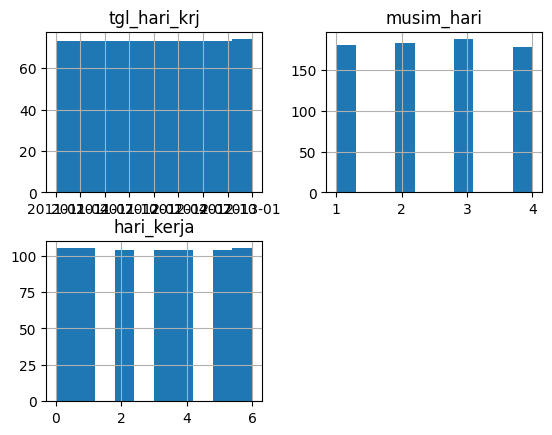

In [14]:
df1.hist()

In [15]:
df1.corr()

,tgl_hari_krj,musim_hari,hari_kerja
tgl_hari_krj,1.000000,0.412224,-0.000016
musim_hari,0.412224,1.000000,-0.003080
hari_kerja,-0.000016,-0.003080,1.000000


#### Data Hour

In [16]:
display(df2.groupby(by="jam").describe())

tgl_hari_jam                                                      \
           count                           mean                  min   
jam                                                                    
0            726  2012-01-02 03:12:23.801652736  2011-01-01 00:00:00   
1            724  2012-01-01 21:08:57.016574464  2011-01-01 00:00:00   
2            715  2012-01-04 22:31:23.076923136  2011-01-01 00:00:00   
3            697  2012-01-07 23:37:16.441893888  2011-01-01 00:00:00   
4            697  2012-01-10 23:33:08.522238208  2011-01-01 00:00:00   
5            717  2012-01-05 07:29:52.468619264  2011-01-01 00:00:00   
6            725  2012-01-01 18:00:29.793103360  2011-01-01 00:00:00   
7            727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
8            727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
9            727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
10           727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
11           727  2012-01-01 02:42:25.254470400  2011-01-01 00:00:00   
12           728  2011-12-31 15:13:50.769230848  2011-01-01 00:00:00   
13           729  2012-01-01 01:13:05.185185280  2011-01-01 00:00:00   
14           729  2012-01-01 01:13:05.185185280  2011-01-01 00:00:00   
15           729  2012-01-01 01:13:05.185185280  2011-01-01 00:00:00   
16           730  2011-12-31 14:04:16.438356224  2011-01-01 00:00:00   
17           730  2011-12-31 14:04:16.438356224  2011-01-01 00:00:00   
18           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
19           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
20           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
21           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
22           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   
23           728  2012-01-01 05:26:22.417582592  2011-01-01 00:00:00   

                                                                    \
                     25%                  50%                  75%   
jam                                                                  
0    2011-07-04 06:00:00  2012-01-02 12:00:00  2012-07-01 18:00:00   
1    2011-07-03 18:00:00  2012-01-02 12:00:00  2012-07-01 06:00:00   
2    2011-07-08 12:00:00  2012-01-06 00:00:00  2012-07-03 12:00:00   
3    2011-07-13 00:00:00  2012-01-08 00:00:00  2012-07-05 00:00:00   
4    2011-07-19 00:00:00  2012-01-12 00:00:00  2012-07-07 00:00:00   
5    2011-07-10 00:00:00  2012-01-06 00:00:00  2012-07-03 00:00:00   
6    2011-07-04 00:00:00  2012-01-02 00:00:00  2012-07-01 00:00:00   
7    2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
8    2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
9    2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
10   2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
11   2011-07-03 12:00:00  2012-01-01 00:00:00  2012-06-30 12:00:00   
12   2011-07-02 18:00:00  2011-12-31 12:00:00  2012-06-30 06:00:00   
13   2011-07-03 00:00:00  2012-01-01 00:00:00  2012-07-01 00:00:00   
14   2011-07-03 00:00:00  2012-01-01 00:00:00  2012-07-01 00:00:00   
15   2011-07-03 00:00:00  2012-01-01 00:00:00  2012-07-01 00:00:00   
16   2011-07-02 06:00:00  2011-12-31 12:00:00  2012-06-30 18:00:00   
17   2011-07-02 06:00:00  2011-12-31 12:00:00  2012-06-30 18:00:00   
18   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
19   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
20   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
21   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
22   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   
23   2011-07-02 18:00:00  2012-01-01 12:00:00  2012-07-01 06:00:00   

                              musim_jam                                     \
                     max  std     count      mean  min  25%  50%  75%  max   
jam         

In [17]:
df2.describe()

,tgl_hari_jam,musim_jam,jam
count,17379,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,11.546752
min,2011-01-01 00:00:00,1.000000,0.000000
25%,2011-07-04 00:00:00,2.000000,6.000000
50%,2012-01-02 00:00:00,3.000000,12.000000
75%,2012-07-02 00:00:00,3.000000,18.000000
max,2012-12-31 00:00:00,4.000000,23.000000
std,NaN,1.106918,6.914405


array([[<Axes: title={'center': 'tgl_hari_jam'}>,
        <Axes: title={'center': 'musim_jam'}>],
       [<Axes: title={'center': 'jam'}>, <Axes: >]], dtype=object)

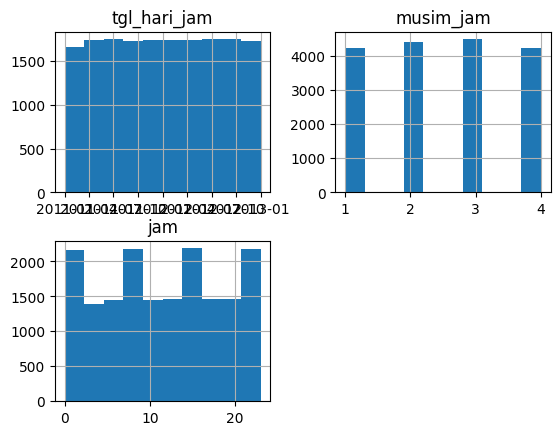

In [18]:
df2.hist()

In [19]:
df2.corr()

,tgl_hari_jam,musim_jam,jam
tgl_hari_jam,1.000000,0.404452,-0.006161
musim_jam,0.404452,1.000000,-0.006117
jam,-0.006161,-0.006117,1.000000


**Insight:**
- Menghitung dan mengukur dataset day berbentuk statistika menggunakan parameter statistika program
- Menghitung dan mengukur dataset hour berbentuk statistika  menggunakan parameter statistika program

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jenis musim apa yang paling sering muncul pada weekday berdasarkan kelompok data harian kerja yang diukurkan dari dataset day?

In [20]:
df1

,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,1,6
1,2011-01-02,1,0
2,2011-01-03,1,1
3,2011-01-04,1,2
4,2011-01-05,1,3
...,...,...,...
726,2012-12-27,1,4
727,2012-12-28,1,5
728,2012-12-29,1,6
729,2012-12-30,1,0


In [21]:
df1.musim_hari = df1.musim_hari.replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})
group_df1 = df1.groupby(by=["musim_hari","hari_kerja"]).agg({"musim_hari":"count"}).rename(columns={'musim_hari': 'jml_musim_hari'}).reset_index()
group_df1

,musim_hari,hari_kerja,jml_musim_hari
0,Fall,0,26
1,Fall,1,26
2,Fall,2,27
3,Fall,3,27
4,Fall,4,28
5,Fall,5,27
6,Fall,6,27
7,Springer,0,27
8,Springer,1,26
9,Springer,2,25


In [22]:
byseason_df1 = pd.merge(left=df1, right=group_df1, on=["musim_hari","hari_kerja"], how="right")
byseason_df1

,tgl_hari_krj,musim_hari,hari_kerja,jml_musim_hari
0,2011-06-26,Fall,0,26
1,2011-07-03,Fall,0,26
2,2011-07-10,Fall,0,26
3,2011-07-17,Fall,0,26
4,2011-07-24,Fall,0,26
...,...,...,...,...
726,2012-11-17,Winter,6,25
727,2012-11-24,Winter,6,25
728,2012-12-01,Winter,6,25
729,2012-12-08,Winter,6,25


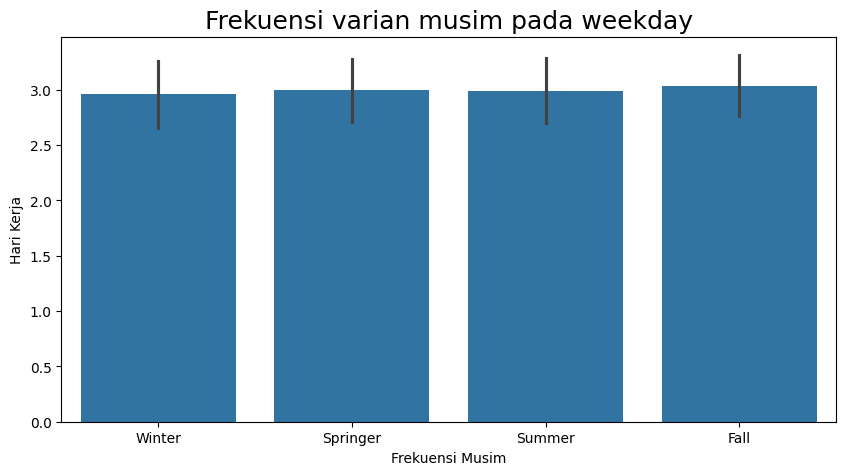

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="musim_hari", 
    y="hari_kerja", 
    data=byseason_df1.sort_values(by="jml_musim_hari", ascending=True))
plt.title("Frekuensi varian musim pada weekday", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Hari Kerja")
plt.xlabel("Frekuensi Musim")
plt.show()

### Pertanyaan 2: Jenis musim dingin apa (termasuk Fall & Winter) yang paling sering muncul terjadi berdasarkan perhitungan jam yang dihasilkan?

In [24]:
df2

,tgl_hari_jam,musim_jam,jam
0,2011-01-01,1,0
1,2011-01-01,1,1
2,2011-01-01,1,2
3,2011-01-01,1,3
4,2011-01-01,1,4
...,...,...,...
17374,2012-12-31,1,19
17375,2012-12-31,1,20
17376,2012-12-31,1,21
17377,2012-12-31,1,22


In [25]:
df2.musim_jam = df2.musim_jam.replace({3: "Fall", 4: "Winter"})
display(df2)
group_df2 = df2.groupby(by=["musim_jam","jam"]).agg({"musim_jam":"count"}).rename(columns={'musim_jam': 'jml_musim_jam'}).reset_index()
display(group_df2)
loc_df2 = group_df2.loc[(group_df2.musim_jam=="Fall") | (group_df2.musim_jam=="Winter")].reset_index(drop=True)
display(loc_df2)

,tgl_hari_jam,musim_jam,jam
0,2011-01-01,1,0
1,2011-01-01,1,1
2,2011-01-01,1,2
3,2011-01-01,1,3
4,2011-01-01,1,4
...,...,...,...
17374,2012-12-31,1,19
17375,2012-12-31,1,20
17376,2012-12-31,1,21
17377,2012-12-31,1,22


,musim_jam,jam,jml_musim_jam
0,1,0,178
1,1,1,178
2,1,2,170
3,1,3,156
4,1,4,154
...,...,...,...
91,Winter,19,177
92,Winter,20,177
93,Winter,21,177
94,Winter,22,177


,musim_jam,jam,jml_musim_jam
0,Fall,0,187
1,Fall,1,186
2,Fall,2,186
3,Fall,3,186
4,Fall,4,187
5,Fall,5,187
6,Fall,6,187
7,Fall,7,188
8,Fall,8,188
9,Fall,9,188


In [26]:
display(df2['jam'].unique())
display(set(df2['jam']))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [27]:
byseason_df2= pd.merge(left=df2, right=loc_df2, on=["musim_jam","jam"], how="right")
byseason_df2

,tgl_hari_jam,musim_jam,jam,jml_musim_jam
0,2011-06-21,Fall,0,187
1,2011-06-22,Fall,0,187
2,2011-06-23,Fall,0,187
3,2011-06-24,Fall,0,187
4,2011-06-25,Fall,0,187
...,...,...,...,...
8723,2012-12-16,Winter,23,177
8724,2012-12-17,Winter,23,177
8725,2012-12-18,Winter,23,177
8726,2012-12-19,Winter,23,177


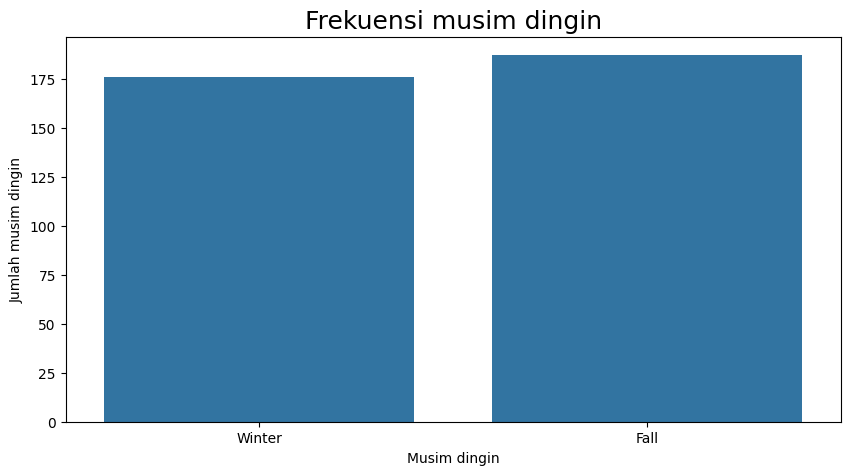

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="musim_jam", 
    y="jml_musim_jam", 
    data=byseason_df2.sort_values(by="jml_musim_jam", ascending=True)
    )
plt.title("Frekuensi musim dingin", loc="center", fontsize=18)
plt.xticks(fontsize=10)
plt.ylabel("Jumlah musim dingin")
plt.xlabel("Musim dingin")
plt.show()

**Insight:**
- Merancang visualisasi mengenai jenis musim paling sering muncul pada weekday berdasarkan data harian yang diukurkan secara menyeluruh, di mana visualiasi dirancangkan berbentuk bar dengan label x berbagai jenis musim dan label y kelompok hari kerja.
- Merancang visualisasi mengenai jenis musim dingin paling sering muncul berdasarkan perhitungan jam yang dihasilkan secara menyeluruh, di mana visualiasinya dirancangkan berbentuk bar plot dengan label x jenis musim dingin adalah Winter dan Fall dan label y jumlah musim dingin terjadi

In [29]:
display(df1)
display(df2)

,tgl_hari_krj,musim_hari,hari_kerja
0,2011-01-01,Springer,6
1,2011-01-02,Springer,0
2,2011-01-03,Springer,1
3,2011-01-04,Springer,2
4,2011-01-05,Springer,3
...,...,...,...
726,2012-12-27,Springer,4
727,2012-12-28,Springer,5
728,2012-12-29,Springer,6
729,2012-12-30,Springer,0


,tgl_hari_jam,musim_jam,jam
0,2011-01-01,1,0
1,2011-01-01,1,1
2,2011-01-01,1,2
3,2011-01-01,1,3
4,2011-01-01,1,4
...,...,...,...
17374,2012-12-31,1,19
17375,2012-12-31,1,20
17376,2012-12-31,1,21
17377,2012-12-31,1,22


In [30]:
main_data = pd.concat([byseason_df1, byseason_df2], ignore_index=True)
display(main_data)

,tgl_hari_krj,musim_hari,hari_kerja,jml_musim_hari,tgl_hari_jam,musim_jam,jam,jml_musim_jam
0,2011-06-26,Fall,0.0,26.0,NaT,NaN,NaN,NaN
1,2011-07-03,Fall,0.0,26.0,NaT,NaN,NaN,NaN
2,2011-07-10,Fall,0.0,26.0,NaT,NaN,NaN,NaN
3,2011-07-17,Fall,0.0,26.0,NaT,NaN,NaN,NaN
4,2011-07-24,Fall,0.0,26.0,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9454,NaT,NaN,NaN,NaN,2012-12-16,Winter,23.0,177.0
9455,NaT,NaN,NaN,NaN,2012-12-17,Winter,23.0,177.0
9456,NaT,NaN,NaN,NaN,2012-12-18,Winter,23.0,177.0
9457,NaT,NaN,NaN,NaN,2012-12-19,Winter,23.0,177.0


In [31]:
main_data.to_csv("dashboard/main_data.csv", index=False)

In [32]:
main_data = pd.read_csv(r'dashboard\main_data.csv')
main_df = pd.DataFrame(main_data)
display(main_df)

,tgl_hari_krj,musim_hari,hari_kerja,jml_musim_hari,tgl_hari_jam,musim_jam,jam,jml_musim_jam
0,2011-06-26,Fall,0.0,26.0,NaN,NaN,NaN,NaN
1,2011-07-03,Fall,0.0,26.0,NaN,NaN,NaN,NaN
2,2011-07-10,Fall,0.0,26.0,NaN,NaN,NaN,NaN
3,2011-07-17,Fall,0.0,26.0,NaN,NaN,NaN,NaN
4,2011-07-24,Fall,0.0,26.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9454,NaN,NaN,NaN,NaN,2012-12-16,Winter,23.0,177.0
9455,NaN,NaN,NaN,NaN,2012-12-17,Winter,23.0,177.0
9456,NaN,NaN,NaN,NaN,2012-12-18,Winter,23.0,177.0
9457,NaN,NaN,NaN,NaN,2012-12-19,Winter,23.0,177.0


In [33]:
df1 = main_df[['tgl_hari_krj','musim_hari', 'hari_kerja', 'jml_musim_hari']].dropna(axis=0, ignore_index=True)
df2 = main_df[['tgl_hari_jam','musim_jam', 'jam', 'jml_musim_jam']].dropna(axis=0, ignore_index=True)
display(df1)
display(df2)

,tgl_hari_krj,musim_hari,hari_kerja,jml_musim_hari
0,2011-06-26,Fall,0.0,26.0
1,2011-07-03,Fall,0.0,26.0
2,2011-07-10,Fall,0.0,26.0
3,2011-07-17,Fall,0.0,26.0
4,2011-07-24,Fall,0.0,26.0
...,...,...,...,...
726,2012-11-17,Winter,6.0,25.0
727,2012-11-24,Winter,6.0,25.0
728,2012-12-01,Winter,6.0,25.0
729,2012-12-08,Winter,6.0,25.0


,tgl_hari_jam,musim_jam,jam,jml_musim_jam
0,2011-06-21,Fall,0.0,187.0
1,2011-06-22,Fall,0.0,187.0
2,2011-06-23,Fall,0.0,187.0
3,2011-06-24,Fall,0.0,187.0
4,2011-06-25,Fall,0.0,187.0
...,...,...,...,...
8723,2012-12-16,Winter,23.0,177.0
8724,2012-12-17,Winter,23.0,177.0
8725,2012-12-18,Winter,23.0,177.0
8726,2012-12-19,Winter,23.0,177.0


In [34]:
main_data.sort_values(by=["tgl_hari_krj","tgl_hari_jam"]).reset_index()


,index,tgl_hari_krj,musim_hari,hari_kerja,jml_musim_hari,tgl_hari_jam,musim_jam,jam,jml_musim_jam
0,342,2011-01-01,Springer,6.0,27.0,NaN,NaN,NaN,NaN
1,188,2011-01-02,Springer,0.0,27.0,NaN,NaN,NaN,NaN
2,215,2011-01-03,Springer,1.0,26.0,NaN,NaN,NaN,NaN
3,241,2011-01-04,Springer,2.0,25.0,NaN,NaN,NaN,NaN
4,266,2011-01-05,Springer,3.0,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9454,8750,NaN,NaN,NaN,NaN,2012-12-20,Winter,19.0,177.0
9455,8927,NaN,NaN,NaN,NaN,2012-12-20,Winter,20.0,177.0
9456,9104,NaN,NaN,NaN,NaN,2012-12-20,Winter,21.0,177.0
9457,9281,NaN,NaN,NaN,NaN,2012-12-20,Winter,22.0,177.0


In [35]:
datetime_col = ["tgl_hari_krj","tgl_hari_jam"]
for column in datetime_col:
    main_data[column] = pd.to_datetime(main_data[column])
main_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9459 entries, 0 to 9458
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tgl_hari_krj    731 non-null    datetime64[ns]
 1   musim_hari      731 non-null    object        
 2   hari_kerja      731 non-null    float64       
 3   jml_musim_hari  731 non-null    float64       
 4   tgl_hari_jam    8728 non-null   datetime64[ns]
 5   musim_jam       8728 non-null   object        
 6   jam             8728 non-null   float64       
 7   jml_musim_jam   8728 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 591.3+ KB


## Conclusion

- Kita memanfaatkan dataset untuk mengetahui visualisasi mengenai komputasi musim secara statistika. Pada proses analisis, menghitung banyaknya berbagai jenis musim pada setiap hari kerja, lalu kemudian dibagikan ke dalam kelompok hari kerja. Jenis musim dan hari kerja dipilihkan untuk mengetahui musim dingin terjadi pada hari kerja dikarenakan faktor pekerjaan pada hari kerja. Berdasarkan visualisasi dan tahap hasil analisis yang dilakukan pada data day, musim Fall paling sering muncul terjadi pada setiap kelompok weekday atau hari kerja. Musim Fall dapat didalami lebih lanjut seperti segera menyiapkan sesuatu yang dapat memenuhi kebutuhan karyawan atau sejenisnya pada hari kerja. Oleh karena itu, hasil visualiasi dan analisis telah menjawab pertanyaan bisnis sehingga kemungkinan besar memenuhi kebutuhan audiens, terutama bisnis.
- Kita memanfaatkan dataset untuk mengetahui visualisasi mengenai komputasi musim secara statistika. Pada proses analisis, memilih beberapa kolom penting yang bisa menghasilkan hasil visualisasi dan analisis yang sangat signifikan karena dataset terdapat lebih seimbang. Maka dari itu, memilih kolom antara jenis musim dingin dan jumlah musim dingin saat mengolah datasetnya, dimana kolom jumlah musim dingin merupakan proses menghitung banyak musim dingin pada setiap kelompok jam. Berdasarkan visualisasi dan tahap hasil analisis yang dilakukan pada data hour, musim Fall paling sering muncul terjadi dengan setiap jam. Musim Fall dapat didalami lebih lanjut seperti segera menyiapkan sesuatu yang diperlukan pada bisnis perusahaan yang dipengaruhi oleh faktor-faktor musim dingin. Oleh karena itu, hasil hasil visualiasi dan analisis telah menjawab pertanyaan bisnis sehingga kemungkinan besar memenuhi kebutuhan audiens, terutama bisnis.

Setelah menganalisis data dengan memanfaatkan dataset yang saya lakukan, ada hal saran yang saya lakukan untuk mengeksplorasi dan menganalisis lebih lanjut adalah memilih kolom atau menambahkan data-data yang cukup beda dengan data sebelumnya agar dapat hasil yang signifikan.